<a href="https://colab.research.google.com/github/sabiko1/Final-Project/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IS53007E: FINAL PROJECT IN COMPUTER SCIENCE (2023-24)
## Part 2: Methods and prototype

## 1. Short summary of my project

In this project, I'll make a system with the deep learning technique to recognise handwritten Japanese hiragana character images offline. To find the best solution, I'll test several deep learning architectures, such as with densely connected networks and Convolution. Comparing each best model of these architectures, this study aims to find and build the most accurate model for recognising handwritten hiragana characters with deep learning. The objective is to show more than 95% accuracy for a given arbitrary hiragana image with the architecture model.



## 2. Requirements

The handwritten Japanese hiragana dataset will be used to train deep learning models that can classify unseen images of Japanese hiragana characters into 75 different categories offline. The model will handle 128 pixel✕ 127 pixel-sized, 16-grayscale images of handwritten hiragana for each character. The training images are based on the dataset (ETL8G) provided by the ETL character database (1), which contains 12075 128-pixel✕ 127-pixel, 16-grayscale images of 75 type handwritten hiragana characters. The model will be built using TensorFlow in Python, and training will be performed on Google Colaboratory.

## 3. Design and Process of the project

To begin, download the dataset to be used from the ETL database webpage. “All data is stored in binary format. The format is derived from the magnetic tape on which the data was originally recorded. All records in a file have the same fixed length without control sequence. The storage unit is 8 bits per byte” and “Bit order is the big endian.”(2) Each record contains meta-information such as JIS Kanji Code (JIS X 0208) and information on the writer (gender, age and occupation), together with the image data. All data are compressed together in a single zip folder.

After evaluation of the image data (including missing and bias checks), the image data will be converted to a format suitable for deep learning (such as normalisation) as a pre-processing step. Data will be split for training, validation and testing.

With building models, first, a simple densely connected network model with two hidden layers will be created, and its performance in a test without training will be checked as a baseline. Then, model training will be carried out, and the model will be tested. Afterwards, the training and testing procedures will be repeated using multiple densely connected network models modified with hyperparameter tuning, dropouts, or regularisation. The densely connected network model with the highest accuracy on the test data among all densely connected network models will be recorded.


Next, I will create a model using CNNs. Similar to the densely connected network model, I will build and evaluate multiple models with hyperparameter tuning and modifications such as dropouts or regularization. I will record the one with the highest accuracy on the test data as the CNN model. (If time permits and ideas arise, I hope to explore architectures beyond simple CNN, as well as methods other than dropout, such as Depthwise separable convolutions or exception models. However, this will require further research and learning. )

Finally, the accuracy of the densely connected network and the CNN models will be compared to reveal the most accurate model. A discussion of the overall process and the accuracy differences in each model will be provided.

(If time allows, I'm considering using image data read in vertical rather than horizontal orientation on the best-performing model as an additional test. This is intended to see the effect of image reading direction on image recognition, considering that Japanese is originally written vertically. We will assess whether there is an improvement in the accuracy of image recognition when the image data is read vertically.)

The flow chart below describes the project process.

In [ ]:
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

Mounted at /content/drive


In [ ]:
from PIL import Image
from IPython.display import display
img = Image.open("/content/drive/MyDrive/Flowchart.png")

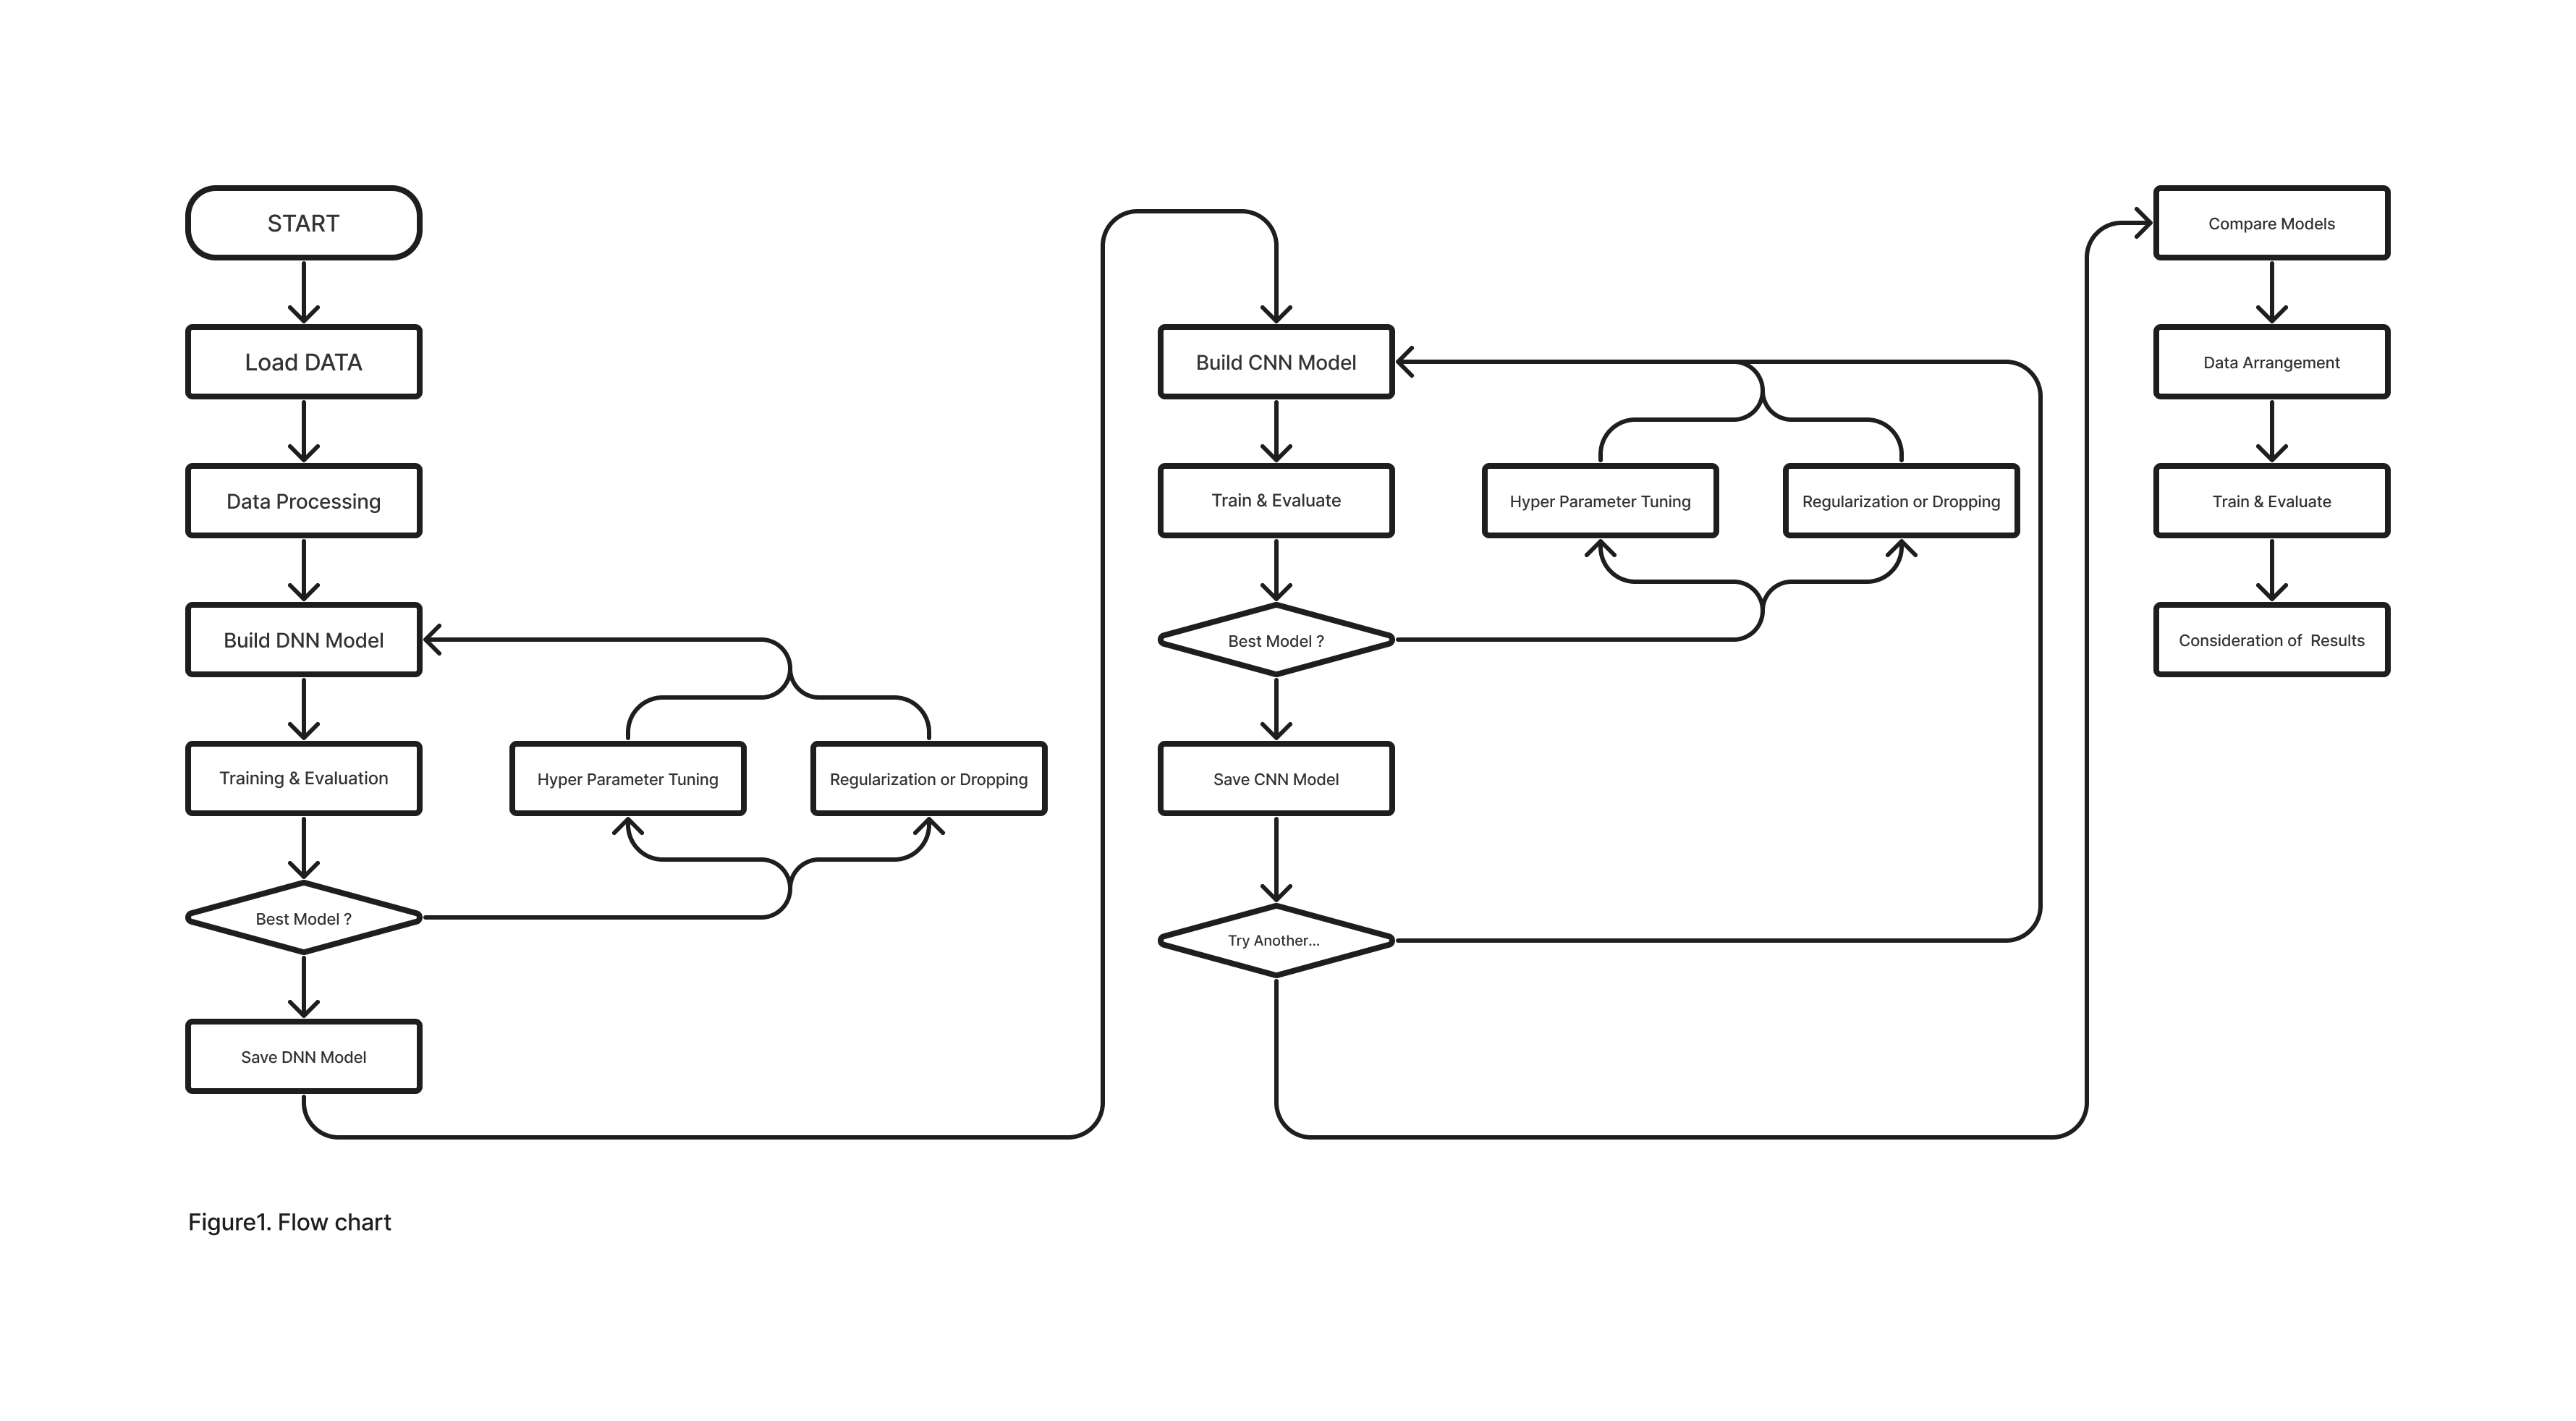

In [ ]:
display(img)

## 4. Prototype demonstration

Here, I'll show the project process with a prototype.
First, I'll build a simple densely connected network model with two hidden layers as a prototype to see


*   The model works as expected and has power in character recognition. (compared the trained model with the untrained model, or with the intuitional baseline from each character frequency.)
*   How much accuracy can the model demonstrate on character recognition at this stage. (The objective for this project is accuracy of 95% or better.)



On prototype building, I'll


*   Use TensorFlow with Python
*   A densely connected network includes two hidden layers and 'ReLU' activation functions.
*   Use 'hiragana' data of ETL8G dataset from 'ETL Character Database'(1)
*   Train the model on Google Colaboratry
*   Save and open the process on the GitHub (3)







### 4.1 DATA Preparation

Download ELT DATASET(ETL8G) from the website and save it in the "DATA_PATH" (beforehand).
Then, unzip the file, read each data in the dataset, and decode binary format data to the appropriate format.

The DATA format of ETL8G is provided at http://etlcdb.db.aist.go.jp/etlcdb/etln/form_e8g.htm. According to the format, I'll decode the data and extract only "Hiragana" data from images and metadata using the JIS Kanji Code. (The whole data includes "Kanji" data also)

After that, I'll check the data features and frequency of each character in it with Pandas Dataframe. I'll reference some codes from a webpage (4) in the data preparation."

In [ ]:
from zipfile import ZipFile
import struct
from PIL import Image
import numpy as np

In [ ]:
# DATA_PATH = "C:/Users/s_abi/OneDrive/デスクトップ/UOL/IS53007E FINAL PROJECT IN COMPUTER SCIENCE (2023-24)/Final Project/Reference"
DATA_PATH = "drive/My Drive/"
RECORD_SIZE = 8199
etl = []
info = []

In [ ]:
with ZipFile("ETL8G.zip") as etl1:
    names = [n for n in etl1.namelist() if "_" in n] #obtain file names in the zip file
    for x in names:
        with etl1.open(x) as f: #access binary file-like object
            while True:
                s = f.read(RECORD_SIZE) #Read and return up to size bytes
                if (s is None) or (len(s) < RECORD_SIZE):
                    break
                r = struct.unpack(">HH8sIBBBBHHHHBB30x8128s11x", s) # Interpret packed binary data, format: http://etlcdb.db.aist.go.jp/etlcdb/etln/form_e8g.htm
                img = Image.frombytes("F", (128, 127), r[14], "bit", (4, 0)) # F:32-bit floating point pixels, 128(X-axis size) * 127(Y-axis size), 16 Gray Level (4bit/pixel)
                img = np.array(img.convert("L"))  # "L" for greyscale
                lbl = r[1] # JIS Kanji Code (JIS X 0208), Hexadecimal code in Decimal
                if lbl in range(int(0x2420), int(0x2474)):  # extract only "Hiragana" by the codes
                    etl.append((img, lbl))
                    info.append(r[:-1]) # the last part of the metadata is nonsence

Show what I've got so far below.

In [ ]:
print(etl[0])

(array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 9250)


In [ ]:
print(info[0])

(1, 9250, b'A.HIRA  ', 1, 0, 0, 1, 24, 3552, 0, 8001, 16880, 0, 0)


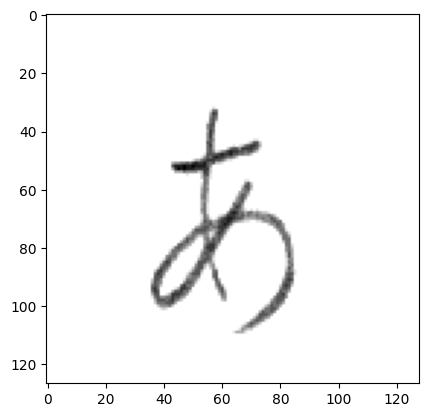

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(etl[0][0], cmap="gray_r")
plt.show()

Make JIS X 0208 to Unicode dictionary (5). Later, use it to transform JIS to utf16 to check the data easily.

In [ ]:
ar = []
#conversion table from Unicode, Inc at https://unicode.org/Public/MAPPINGS/OBSOLETE/EASTASIA/JIS/JIS0208.TXT
# with open(DATA_PATH + "/JIS0208.TXT") as f:
with open("JIS0208.txt") as f:
    for t_line in f:
        if t_line[0] != "#": # skip none codes
            sjis, jis, utf16 = os.path.basename(t_line).split("\t")[0:3]
            ar.append([jis, utf16])
ar = dict(ar) # "jis: utf16" dictionary

In [ ]:
print(ar)

{'0x2121': '0x3000', '0x2122': '0x3001', '0x2123': '0x3002', '0x2124': '0xFF0C', '0x2125': '0xFF0E', '0x2126': '0x30FB', '0x2127': '0xFF1A', '0x2128': '0xFF1B', '0x2129': '0xFF1F', '0x212A': '0xFF01', '0x212B': '0x309B', '0x212C': '0x309C', '0x212D': '0x00B4', '0x212E': '0xFF40', '0x212F': '0x00A8', '0x2130': '0xFF3E', '0x2131': '0xFFE3', '0x2132': '0xFF3F', '0x2133': '0x30FD', '0x2134': '0x30FE', '0x2135': '0x309D', '0x2136': '0x309E', '0x2137': '0x3003', '0x2138': '0x4EDD', '0x2139': '0x3005', '0x213A': '0x3006', '0x213B': '0x3007', '0x213C': '0x30FC', '0x213D': '0x2015', '0x213E': '0x2010', '0x213F': '0xFF0F', '0x2140': '0x005C', '0x2141': '0x301C', '0x2142': '0x2016', '0x2143': '0xFF5C', '0x2144': '0x2026', '0x2145': '0x2025', '0x2146': '0x2018', '0x2147': '0x2019', '0x2148': '0x201C', '0x2149': '0x201D', '0x214A': '0xFF08', '0x214B': '0xFF09', '0x214C': '0x3014', '0x214D': '0x3015', '0x214E': '0xFF3B', '0x214F': '0xFF3D', '0x2150': '0xFF5B', '0x2151': '0xFF5D', '0x2152': '0x3008',

Make JIS X 0208 to Unicode decoder. Transform JIS X 0208 cades from decimal to hexadecimal, then look up the the JIS-Unicode dictionary.

In [ ]:
def decoder(x):
    x = str(hex(x))[2:] # JIS X 0208: Decimal to Hexadecimal, remove first 2 '0x' for making the rest upper case later
    return chr(int(ar["0x"+x.upper()], 16)) # Unicode matched with JIS X in Hex, make it to Decimal then unicode character

In [ ]:
print(decoder(etl[0][1]))

あ


Use pandas dataframe to evaluate the data

In [ ]:
import pandas as pd

col_names = ["sheet","jis_code","reading","id","eval_ind",
             "eval_group","sex","age","id_industrial","occupation",
             "date_sheet","date_scan","x","y"]  ## Obtain from data format description

df = pd.DataFrame(info, columns=col_names)
df["reading"] = df["reading"].apply(lambda x: x.decode())
df["label"] = df["jis_code"].apply(decoder)

Check and Evaluate the data made

In [ ]:
df.head(5)

,sheet,jis_code,reading,id,eval_ind,eval_group,sex,age,id_industrial,occupation,date_sheet,date_scan,x,y,label
0,1,9250,A.HIRA,1,0,0,1,24,3552,0,8001,16880,0,0,あ
1,1,9252,I.HIRA,16,0,0,1,24,3552,0,8001,16880,2,1,い
2,1,9254,U.HIRA,31,0,0,1,24,3552,0,8001,16880,4,2,う
3,1,9256,E.HIRA,46,0,0,1,24,3552,0,8001,16880,6,3,え
4,1,9258,O.HIRA,61,0,0,1,24,3552,0,8001,16880,8,4,お


In [ ]:
print(df.shape)

(12075, 15)


In [ ]:
print(df['label'].value_counts(normalize=True, sort=True)) # show frequency of each word to check bias

あ    0.013333
ほ    0.013333
べ    0.013333
へ    0.013333
ぷ    0.013333
       ...   
ぜ    0.013333
せ    0.013333
ず    0.013333
す    0.013333
ん    0.013333
Name: label, Length: 75, dtype: float64


The above shows that the frequency of each of the 75 characters is balanced at 1.33%.

Check the data as an image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=26aaf241124c29324962467b9b17df871c7387570676b5ce8dd71f5edb3e8483
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


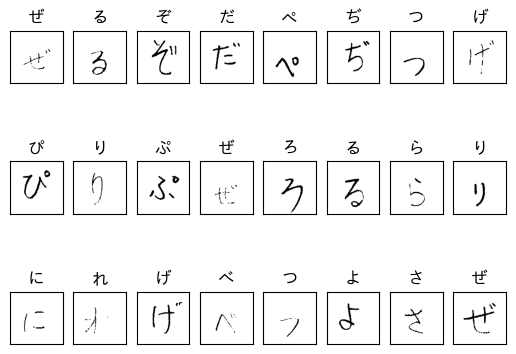

In [ ]:
!pip install japanize-matplotlib
import japanize_matplotlib  # to show Japanese in matplotlib

perm = np.random.permutation(range(len(etl))) # shuffle the order
for k in range(24):
    plt.subplot(3, 8, k+1)
    plt.xticks([])
    plt.yticks([])
    img, lbl = etl[perm[k]]
    plt.imshow(img>=4, cmap="gray_r")
    plt.title(decoder(lbl))
plt.show()

The images and labels are paired correctly.

### Modify the data for deep learning.

Convert the data for deep learning. Transform the image data to a two-dimensional numpy array with numbers scaled from 0 to 1 to be handled easily. The label will be one-hot vectors. Divide All data into a training dataset and a test dataset.

Make a NumPy array of images

In [ ]:
import numpy as np
# images
x = np.array([etl[i][0] for i in range(len(etl))], dtype="float32")

print(x.shape) # 12075 images of 127 * 128 pixels

(12075, 127, 128)


Make a NumPy array of labels

In [ ]:
# Assign numbers to each label of UTF 16
label_list = df["label"].unique() # select unique character
label_dict = {k:v for v,k in enumerate(label_list)} #dictionary: assign numbers to each character

print(label_dict)
print(len(label_list))  # number of labels

{'あ': 0, 'い': 1, 'う': 2, 'え': 3, 'お': 4, 'か': 5, 'が': 6, 'き': 7, 'ゃ': 8, 'ぎ': 9, 'く': 10, 'ぐ': 11, 'け': 12, 'げ': 13, 'こ': 14, 'ご': 15, 'さ': 16, 'ざ': 17, 'し': 18, 'ゅ': 19, 'じ': 20, 'す': 21, 'ず': 22, 'せ': 23, 'ぜ': 24, 'そ': 25, 'ぞ': 26, 'た': 27, 'だ': 28, 'ち': 29, 'ょ': 30, 'ぢ': 31, 'つ': 32, 'づ': 33, 'て': 34, 'で': 35, 'と': 36, 'ど': 37, 'な': 38, 'に': 39, 'っ': 40, 'ぬ': 41, 'ね': 42, 'の': 43, 'は': 44, 'ば': 45, 'ぱ': 46, 'ひ': 47, 'び': 48, 'ぴ': 49, 'ふ': 50, 'ぶ': 51, 'ぷ': 52, 'へ': 53, 'べ': 54, 'ぺ': 55, 'ほ': 56, 'ぼ': 57, 'ぽ': 58, 'ま': 59, 'み': 60, 'む': 61, 'め': 62, 'も': 63, 'や': 64, 'ゆ': 65, 'よ': 66, 'ら': 67, 'り': 68, 'る': 69, 'れ': 70, 'ろ': 71, 'わ': 72, 'を': 73, 'ん': 74}
75


In [ ]:
# Make a NumPy array of labels in numbers assigned according to the character
y = np.array([label_dict[decoder(etl[i][1])] for i in range(len(etl))], dtype="int8")
# y = np.array([label_dict[decoder(etl[i][1])] for i in range(len(etl))], dtype="int64")

print(y.shape)

(12075,)


30


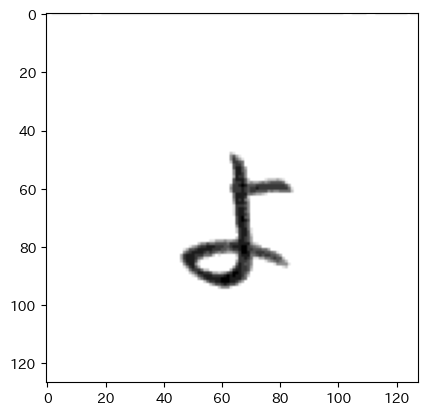

In [ ]:
plt.imshow(x[180], cmap="gray_r")
print(y[180])

Divide the data into for train and test

In [ ]:
train_ratio = 0.8 #define a ratio on train and test

train_images, test_images = np.split(x, [int(len(x) * train_ratio)])  # separate data with the ratio
train_targets, test_targets = np.split(y, [int(len(y) * train_ratio)]) # separate targets

In [ ]:
print(train_images.shape)
print(test_images.shape)

(9660, 127, 128)
(2415, 127, 128)


Flatten and rescale the image data

In [ ]:
train_images = train_images.reshape((9660, 127 * 128)) # reshape flattens 127 x 128 arrays
test_images = test_images.reshape((2415, 127 * 128))   # to vectors of 16256 elements

train_images /= 16   # cast as floats and rescale to [0, 1]
test_images /= 16

Transform the labels to One-Hot vectors.

In [ ]:
from tensorflow.keras.utils import to_categorical # encode with the "to_categorical" function

train_labels = to_categorical(train_targets)
test_labels  = to_categorical(test_targets)

# check encoding
print(test_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


In [ ]:
print(test_labels.shape)

(2415, 75)


## 4.2 Build Deep Neural Network model with tensorflow

Now, I'll build an initial fully densely connected deep-learning model with two hidden layers and see how it works. After each layer, I'll use 'Rectified Linear Unit (ReLU)' as an activation function. Loss function, optimizer, and metrics will be "categorical crossentropy", 'RMSprop' and 'accuracy', respectively.

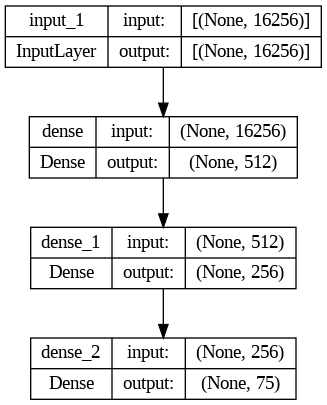

In [ ]:
import tensorflow as tf
import keras
from keras import layers

inputs = keras.Input(shape=(127*128,))

# dense layers
dense = layers.Dense(512, activation='relu')
x = dense(inputs)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(75, activation='softmax')(x)

# create a model
model1 = keras.Model(inputs=inputs, outputs=outputs, name="model1")

# show the model1
keras.utils.plot_model(model1, "model1.png", show_shapes=True)

Evaluate the first model without training

In [ ]:
model1.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

test_loss, test_acc = model1.evaluate(test_images, test_labels) # model1 without training

print('test_acc:', test_acc)

76/76 [==============================] - 2s 20ms/step - loss: 4.3181 - accuracy: 0.0108
test_acc: 0.010766045190393925


Train the first model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Early stop if val_loss sees no improvement

history1 = model1.fit(train_images, train_labels, validation_split=0.2, epochs=15, batch_size=128, callbacks=[callback]) # 0.2 for validation

Epoch 1/15
61/61 [==============================] - 12s 183ms/step - loss: 2.7623 - accuracy: 0.3311 - val_loss: 2.2905 - val_accuracy: 0.4363
Epoch 2/15
61/61 [==============================] - 11s 186ms/step - loss: 1.3294 - accuracy: 0.6660 - val_loss: 1.8631 - val_accuracy: 0.5280
Epoch 3/15
61/61 [==============================] - 13s 210ms/step - loss: 0.8885 - accuracy: 0.7708 - val_loss: 1.6641 - val_accuracy: 0.5590
Epoch 4/15
61/61 [==============================] - 13s 213ms/step - loss: 0.5719 - accuracy: 0.8615 - val_loss: 1.6581 - val_accuracy: 0.5523
Epoch 5/15
61/61 [==============================] - 11s 177ms/step - loss: 0.3807 - accuracy: 0.9102 - val_loss: 1.6680 - val_accuracy: 0.5481
Epoch 6/15
61/61 [==============================] - 13s 214ms/step - loss: 0.2439 - accuracy: 0.9469 - val_loss: 1.4909 - val_accuracy: 0.6201
Epoch 7/15
61/61 [==============================] - 13s 209ms/step - loss: 0.1561 - accuracy: 0.9695 - val_loss: 1.4134 - val_accuracy: 0.6335

Plot the model training history

In [ ]:
def plot_loss(x):

    history_dict = x.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

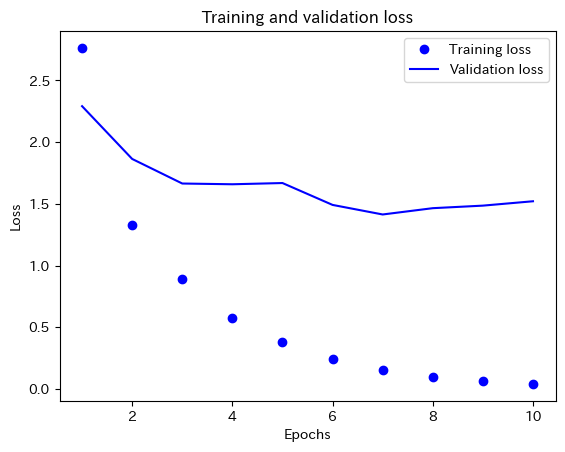

In [ ]:
plot_loss(history1)

In [ ]:
model1_loss, model1_acc = model1.evaluate(test_images, test_labels)

print('model1_acc:', model1_acc)

76/76 [==============================] - 2s 20ms/step - loss: 1.2968 - accuracy: 0.6758
model1_acc: 0.6757764220237732


The first trained model1 showed a test accuracy of 0.6758, which indicated the improvement with training and was above the baseline from the without-trained model1 of 0.0108 accuracy or common sense based on the frequency of each character of 0.01333.

The initial model showed some statistical power. However, it didn't reach my expectation: over 95% accuracy. Therefore, first, I'll tune the hyperparameters and equip the model with some functions, such as the dropping or regulation method. After I reach the maxmum accuracy gained with densely connected network architecture, I'll implement CNN models.

## 5. Progress and update

I have kept the project on track with regular consultations with my supervisor, setting small goals and following the initial progression plan. I also use deadlines for assignment submissions as a single time frame.

Based on feedback and advice from the supervisor, changes were made to the original project plan due to ambiguities. Specifically, I initially considered the primary project deliverable to be constructing a character recognition system using Tesseract and a brief technical description of the system. This was changed to the aim of creating my own OCR model using deep learning with Python TensorFlow and achieving a character recognition accuracy of more than 95% for Hiragana by the model. This change made it possible to define the specific goals of the project and facilitated the development of consistent research.

The project plans to develop using agile methods. The entire project will be progressed by repeating trials, evaluations, and improvements each step. It is anticipated that this may require modifications to the plan, but I have tried to ensure at the planning stage that there is enough time to allow for this.

It has been challenging to load the training data in binary format, but I managed to prepare it for training using online resources (4) and other references. Initially, I planned to train on a class of 956 characters, including Kanji characters. However, the amount of data became so large that it became difficult to proceed with the training due to RAM dose overload on Colab. Therefore, only hiragana in the 75-character class will be used as study material. I will proceed with the project in hiragana, but I would also like to consider solutions concerning the problem of RAM overload due to the data size. Now, I'm trying to implement Dataset.from_generator and TFRecord data. This may change the codes described above, but I hope they will help with working on large data like the dataset with Chinese characters.

Although the model at present is basic, it can be assessed as having shown some statistical power. However, it has yet to reach the target of more than 95% accuracy and needs to be improved. In parallel with progressing the project, I realise that further learning is required regarding technical methods that could help improve the model. In addition, due to the change of plans, previously drafted reports need to be revised.

Generally, I have learned about the essential planning and preparation methods for doing the project, and this project has been proving me with chances to learn about deep learning deeply. In the following steps, the current densely connected network model will be improved using hyperparameter adjustment and dropout, and after that, the CNN model will be built. Additionally, I plan to acquire other knowledge that could be useful for improving the model and gradually integrate it into the model. Specifically, by the end of December, I plan to build the best densely connected network and CNN models and compare their performance. Another method of improving the model or building a model with Chinese character recognition, will be reviewed from January onwards. However, taking into account the possibility that time may be taken up by life events, busyness in other subjects, illness and other unforeseen events, priority will be given first to proceeding with the project in densely connected network and CNN, which are currently planned. Other methods will be tried if time allows. Record the results of the best densely connected network and CNN models separately after testing each modified model. Finally, the best performance model among all will be selected, and the project process and the cause of the results will be considered.

As a risk management measure, data is stored in online data storage such as Google Drive or GitHub on a time-by-time basis to prepare for the risk of loss of local data. In the event of computer malfunction or difficulty accessing home computers, projects can be continued by accessing these online data from other computers. Even when internet access is unavailable, it is possible to write about the parts of the process that exclude deep learning training in the local environment.

## 6. Ethical consideration

The character images and additional information in the ETL Character Database were collected between 1973 and 1984 at the National Institute of Advanced Industrial Science and Technology (AIST) in Japan. Due to the historical background and the nature of the research on the Japanese language, I am assuming that only Japanese nationals and residents of Japan were targeted. Although additional information in this database can contain personal data, it is not subject to GDPR. In addition, the data is anonymised and individuals cannot be identified. It is copyrighted by the AIST and may be used free of charge for non-commercial purposes only.

## 6. Reference

1. Electrotechnical Laboratory, Japanese Technical Committee for Optical Character Recognition, ETL Character Database, 1973-1984.

2. ‘File Formats and Sample Script – etlcdb’. Accessed 6 December 2023. http://etlcdb.db.aist.go.jp/file-formats-and-sample-unpacking-code?lang=ja.

3. sabiko1. ‘Sabiko1/Final-Project’, 3 December 2023. https://github.com/sabiko1/Final-Project.

4. Life Study. ‘【ひらがな認識AI①】データをゲットして使える型に変換しよう’. Study Life, 27 November 2022. https://matsuda-blog.info/2642/.

5. Unicode org. Accessed 3 December 2023. https://unicode.org/Public/MAPPINGS/OBSOLETE/EASTASIA/JIS/JIS0208.TXT